In [95]:
import nazca as nd
import numpy as np

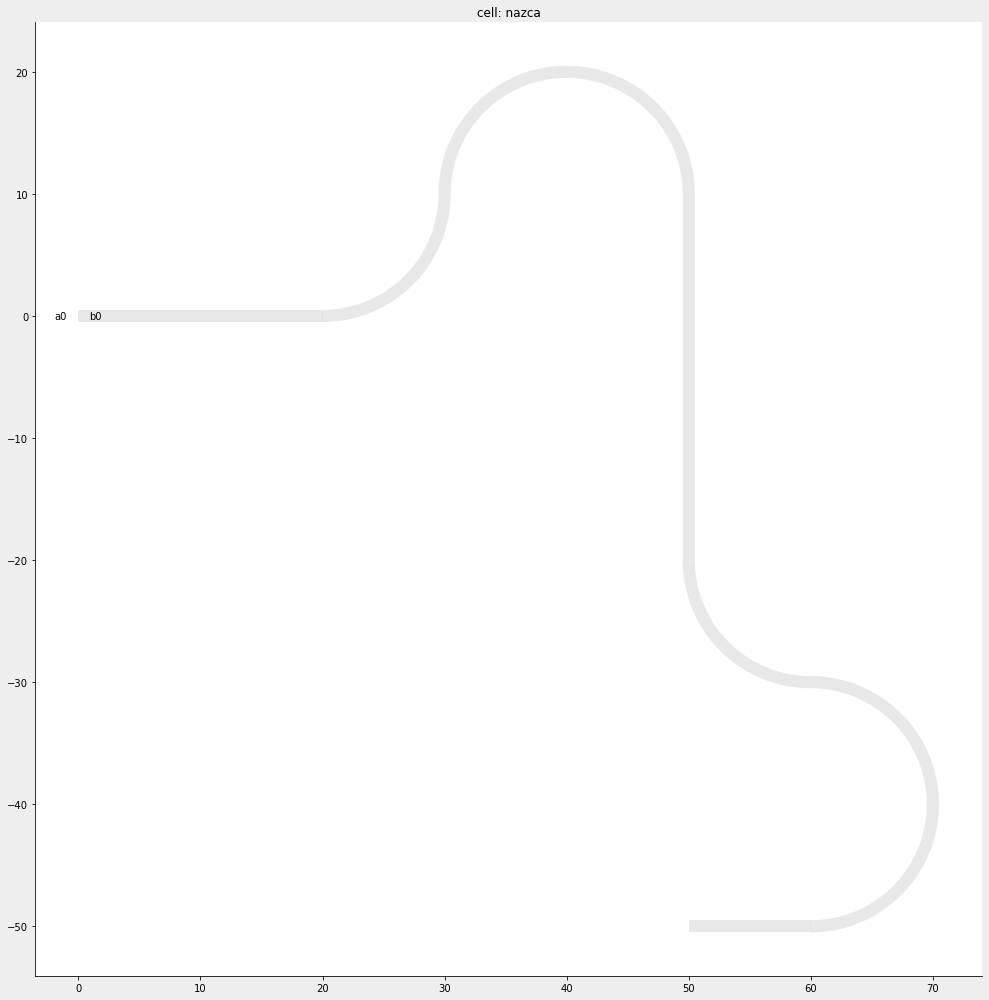

In [4]:


nd.strt(length=20).put()
nd.bend(angle=90).put()
nd.bend(angle=-180).put()
nd.strt(length=10).put()
nd.export_plt() 
#nd.export_gds()

The number of 5pacs is 31.


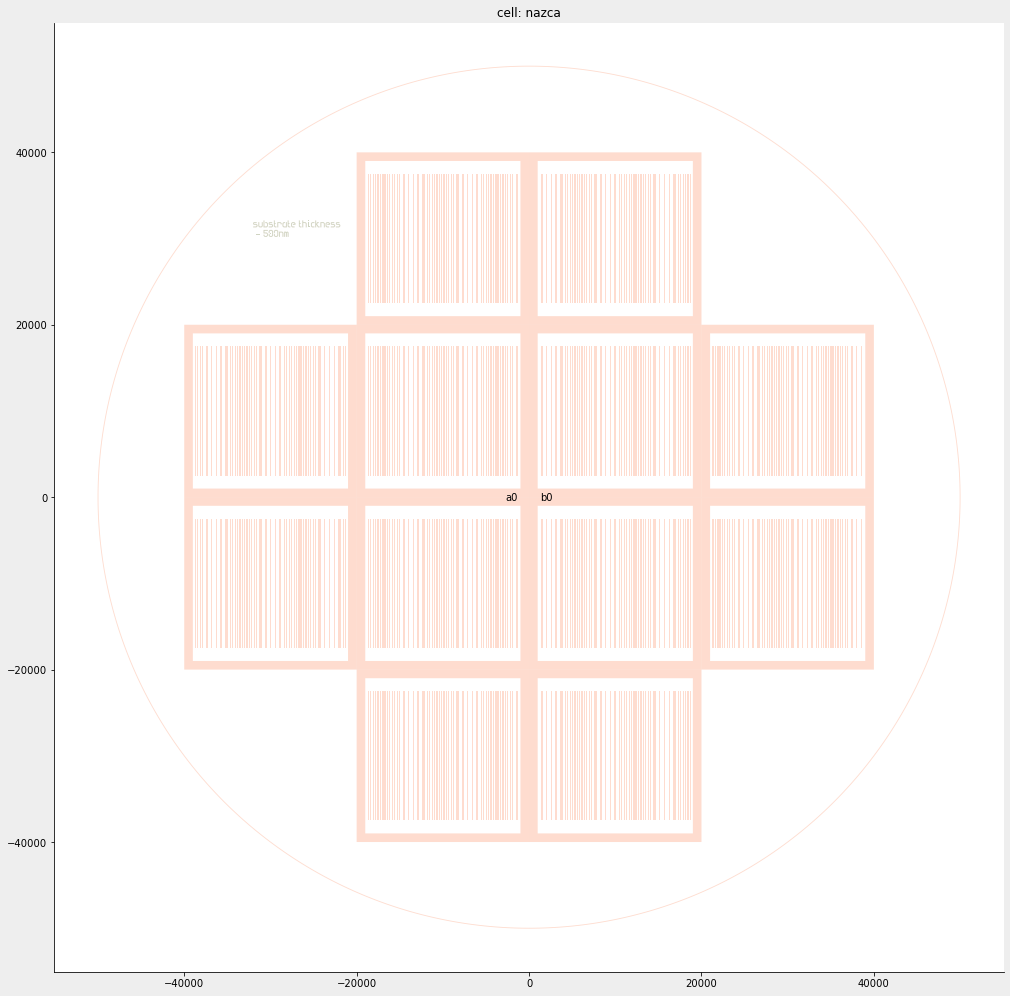

In [80]:
wg_length = 15000
wg_width =50 
layer1 = (1,0)
radius = 100000 / 2
filename = r"D:\Caltech\Mask\My_Design\layer_1111.gds"
# Define the outer square (side = 20,000)
outer_square = [
    (-10000, -10000),
    (10000, -10000),
    (10000, 10000),
    (-10000, 10000),
    (-10000, -10000)
]

# Define the inner square (side = 18,000)
inner_square = [
    (-9000, -9000),
    (9000, -9000),
    (9000, 9000),
    (-9000, 9000),
    (-9000, -9000)
]

# Reverse the direction of the inner square to perform the subtraction
frame_points = outer_square + inner_square[::-1]

with nd.Cell("safe_zone") as safe_zone:
    nd.Polygon(layer=layer1, points=frame_points).put()

with nd.Cell("5pac") as five_wave: #overall cell width is 370
    for i in range(5):
        x_loc = i*80
        nd.strt(length=wg_length, width=wg_width,layer=layer1).put(x_loc, 0,90)

with nd.Cell("disk") as disk:
    nd.bend(radius=100000/2, angle=360, width=100,layer=layer1).put(0, 0)
counter = 0 
#Massively filled the square
with nd.Cell("one_square") as single:
    k = -8700
    while (k<9000-570):
        five_wave.put(k, -7500, align='center')
        k += 570
        counter+=1
    safe_zone.put(0, 0, align='center')
print(f'The number of 5pacs is {counter}.')
'''
single.put(0,0)
disk.put(0,-50000) #place the center of the circle at (0,0)
#nd.export_gds(topcells=single, filename=filename)
nd.export_plt()
'''

# Create the filling cell with "single" cells
with nd.Cell("filled_disk") as filled_disk:
    grid_step = 20000  # Assuming the width of "single" is 370 units
    for x in np.arange(-radius, radius, grid_step):
        for y in np.arange(-radius, radius, grid_step):
            if x**2 + y**2 <= (radius-15000)**2:  # Check if the center is inside the circle
                single.put(x, y, align='center')

with nd.Cell("ultimate_fucker") as ultimate_fucker:
    filled_disk.put(0, 0)
    disk.put(0, -50000)

#Silk layer
text_content = "substrate thickness \n = 500nm"   
with nd.Cell("wafer_thickness_label") as subthickness:
    nd.text(text=text_content, height=1000 , layer=layer1).put(0, 0)

ultimate_fucker.put(0,0)
subthickness.put(-32000,30000)

a=1
# Export the design to a GDS file or plot it
#nd.export_gds(filename=filename)
if a:
    nd.export_plt()
elif not a:
    nd.export_gds(filename=filename)

In [ ]:
wg_length = 15000
wg_width =50 
layer1 = (1,0)
radius = 100000 / 2
filename = r"D:\Caltech\Mask\My_Design\layer_1111.gds"
# Define the outer square (side = 20,000)
outer_square = [
    (-10000, -10000),
    (10000, -10000),
    (10000, 10000),
    (-10000, 10000),
    (-10000, -10000)
]

# Define the inner square (side = 18,000)
inner_square = [
    (-9000, -9000),
    (9000, -9000),
    (9000, 9000),
    (-9000, 9000),
    (-9000, -9000)
]

# Reverse the direction of the inner square to perform the subtraction
frame_points = outer_square + inner_square[::-1]

with nd.Cell("safe_zone") as safe_zone:
    nd.Polygon(layer=layer1, points=frame_points).put()

with nd.Cell("5pac") as five_wave: #overall cell width is 370
    for i in range(5):
        x_loc = i*80
        nd.strt(length=wg_length, width=wg_width,layer=layer1).put(x_loc, 0,90)

with nd.Cell("disk") as disk:
    nd.bend(radius=100000/2, angle=360, width=100,layer=layer1).put(0, 0)
counter = 0 
#Massively filled the square
with nd.Cell("one_square") as single:
    k = -8700
    while (k<9000-570):
        five_wave.put(k, -7500, align='center')
        k += 570
        counter+=1
    safe_zone.put(0, 0, align='center')
print(f'The number of 5pacs is {counter}.')

In [88]:
bitch=0.5
core=30
nd.strt(length=wg_length, width=core).put(0, 0,90, align='center')
nd.strt(length=wg_length, width=bitch).put(core/2+5, 0,90, align='center')
nd.strt(length=wg_length, width=bitch).put(-core/2-5, 0,90, align='center')
nd.export_gds(filename=r"D:\Caltech\Mask\My_Design\test.gds")



Starting layout export...
...gds generation
...Wrote file 'D:\Caltech\Mask\My_Design\test.gds'


In [113]:
wg_length = 15000
wg_width =50 
layer1 = (1,0)
layer2 = (2,0)
radius = 100000 / 2
filename = r"D:\Caltech\Mask\My_Design\test.gds"

a=0
bitch=0.5
core=30
execution_list = np.arange(500,3600,100)/1000
counter = 0 
side_length = 100

# Define the outer square (side = 20,000)
outer_square = [
    (-10000, -10000),
    (10000, -10000),
    (10000, 10000),
    (-10000, 10000),
    (-10000, -10000)
]

# Define the inner square (side = 18,000)
inner_square = [
    (-9000, -9000),
    (9000, -9000),
    (9000, 9000),
    (-9000, 9000),
    (-9000, -9000)
]

# Reverse the direction of the inner square to perform the subtraction
frame_points = outer_square + inner_square[::-1]


with nd.Cell("safe_zone") as safe_zone:
    nd.Polygon(layer=layer1, points=frame_points).put()
    

'''
with nd.Cell("5pac") as five_wave: #overall cell width is 370
    for i in range(5):
        x_loc = i*80
        nd.strt(length=wg_length, width=core).put(0, 0,90, align='center')
        nd.strt(length=wg_length, width=bitch).put(core/2+5, 0,90, align='center')
        nd.strt(length=wg_length, width=bitch).put(-core/2-5, 0,90, align='center')
'''

def neighbourhood(coree, bitch, wg_length, layer, cell_name):
    """Creates a waveguide pattern with given core and cladding dimensions."""
    
    with nd.Cell(cell_name) as five_wave:
        for i in range(5):
            x_loc = i * 80
            nd.strt(length=wg_length, width=coree, layer=layer).put(x_loc, 0, 90, align='center')
            nd.strt(length=wg_length, width=bitch, layer=layer).put(x_loc+coree / 2 + 5, 0, 90, align='center')
            nd.strt(length=wg_length, width=bitch, layer=layer).put(x_loc-coree / 2 - 5, 0, 90, align='center')

        #silk
        text_content = f"{bitch} um"
        nd.text(text=text_content, height=80, layer=layer, align='cc').put(2*80, wg_length + 100, 0)    
    return five_wave


with nd.Cell("disk") as disk:
    nd.bend(radius=100000/2, angle=360, width=100,layer=layer1).put(0, 0)


with nd.Cell("square") as square_cell:
    nd.Polygon(points=[
        (-side_length/2, -side_length/2),  # Bottom-left corner
        (side_length/2, -side_length/2),   # Bottom-right corner
        (side_length/2, side_length/2),    # Top-right corner
        (-side_length/2, side_length/2),   # Top-left corner
        (-side_length/2, -side_length/2)   # Closing the polygon
    ], layer=layer2).put(0, 0)
with nd.Cell("alignment") as align:
    square_cell.put(-100,100)
    square_cell.put(100,100)
    square_cell.put(-100,-100)
    square_cell.put(100,-100)


#Massively filled the square
with nd.Cell("one_square") as single:
    k = -8700
    while (k<9000-570):
        bitch = execution_list[counter]
        neighbourhood(core,bitch,wg_length,layer=layer1,cell_name=str(counter)).put(k, -7500, align='center')
        k += 570
        counter+=1
    safe_zone.put(0, 0, align='center')
    align.put(-8500,8500)
    align.put(8500,8500)

    align.put(-8500,-8500)
    align.put(8500,-8500)
    
print(f'The number of 5pacs is {counter}.')

# Create the filling cell with "single" cells
with nd.Cell("filled_disk") as filled_disk:
    grid_step = 20000  # Assuming the width of "single" is 370 units
    for x in np.arange(-radius, radius, grid_step):
        for y in np.arange(-radius, radius, grid_step):
            if x**2 + y**2 <= (radius-15000)**2:  # Check if the center is inside the circle
                single.put(x, y, align='center')

with nd.Cell("ultimate_fucker") as ultimate_fucker:
    filled_disk.put(0, 0)
    disk.put(0, -50000)

#Silk layer
text_content = "substrate thickness \n = 500nm"   
with nd.Cell("wafer_thickness_label") as subthickness:
    nd.text(text=text_content, height=1000 , layer=layer1).put(0, 0)

ultimate_fucker.put(0,0)
subthickness.put(-32000,30000)


# Export the design to a GDS file or plot it
#nd.export_gds(filename=filename)
if a:
    nd.export_plt()
elif not a:
    nd.export_gds(filename=filename)

The number of 5pacs is 31.
Starting layout export...
...gds generation
...Wrote file 'D:\Caltech\Mask\My_Design\test.gds'


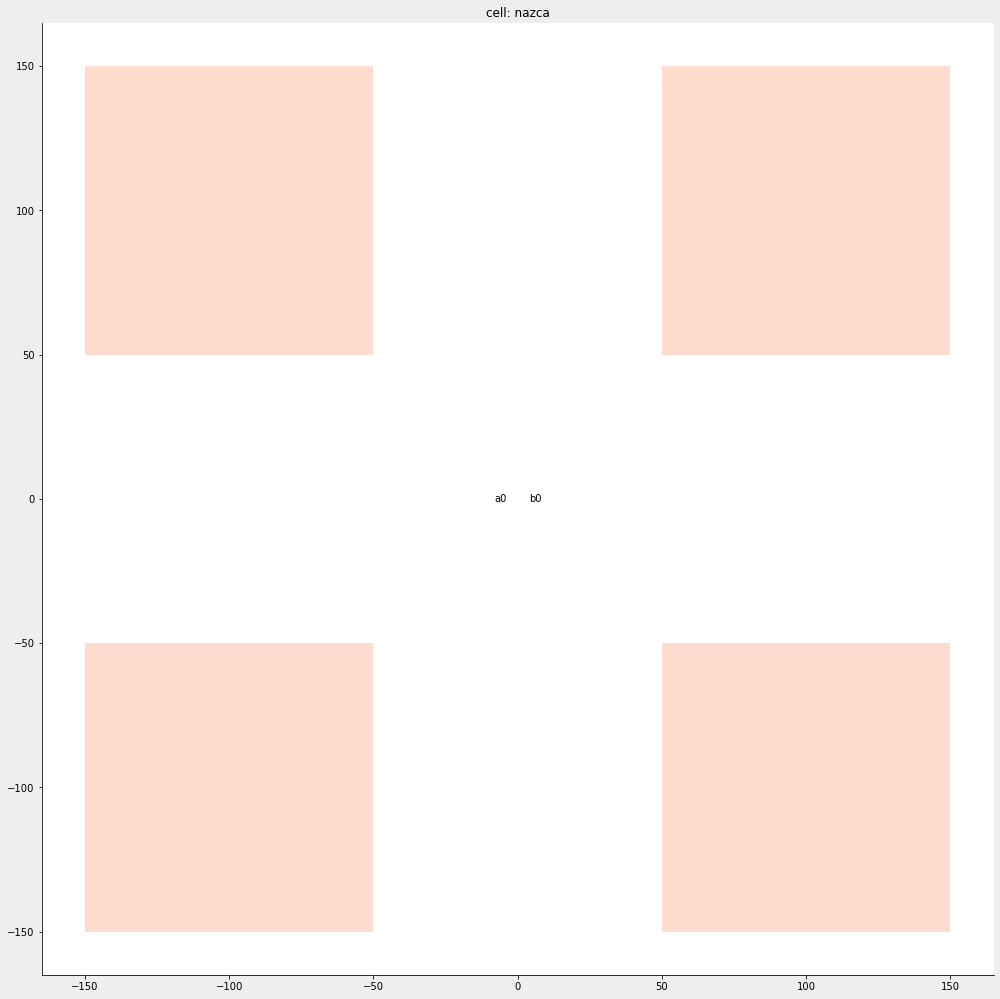

In [112]:
side_length = 100
with nd.Cell("square") as square_cell:
    nd.Polygon(points=[
        (-side_length/2, -side_length/2),  # Bottom-left corner
        (side_length/2, -side_length/2),   # Bottom-right corner
        (side_length/2, side_length/2),    # Top-right corner
        (-side_length/2, side_length/2),   # Top-left corner
        (-side_length/2, -side_length/2)   # Closing the polygon
    ], layer=layer2).put(0, 0)
with nd.Cell("alignment") as align:
    square_cell.put(-100,100)
    square_cell.put(100,100)
    square_cell.put(-100,-100)
    square_cell.put(100,-100)
align.put(0,0)
nd.export_plt()

In [29]:
print(frame_points)

[(-10000, -10000), (10000, -10000), (10000, 10000), (-10000, 10000), (-10000, -10000), (-9000, -9000), (-9000, 9000), (9000, 9000), (9000, -9000), (-9000, -9000)]


In [23]:
square1 = [(0, -5), (5, 0), (0, 5), (-5, 0), (0, -5)]
square2 = [(-10, -10), (10, -10), (10, 10), (-10, 10), (-10,-10)]
diff = square2 + square1[::-1] # reverse direction of inner shape square1

nd.Polygon(layer=1, points=square1).put()
nd.Polygon(layer=3, points=square2).put()
nd.Polygon(layer=5, points=diff).put(30)

nd.export_gds()

Starting layout export...
...gds generation
...Wrote file './nazca_export.gds'


In [94]:
len(np.arange(500,3600,100))

31